### Importing Basic libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import metrics

### Importing ML libraries

In [73]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot

# Loading the dataset

In [42]:
path = "D:/R DATA/cancer_data.csv"
df = pd.read_csv(path)

In [43]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
df = df.drop(['id'], axis = 1)


# target variable

In [45]:
 y = df.diagnosis

In [52]:
y = y.to_frame()
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [79]:
y.diagnosis = y.diagnosis.replace({'M' : 0, "B" : 1})

In [80]:
y.diagnosis.unique()

array([0, 1], dtype=int64)

In [47]:
# DROPPING THE UNNAMED COLUMN
df = df.drop(['Unnamed: 32'], 1)
df = df.drop(['diagnosis'], axis = 1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Understanding data

In [48]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [81]:
df.shape

(569, 30)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

# EDA

### checking the distribution of y variable to see if it is unbalanced

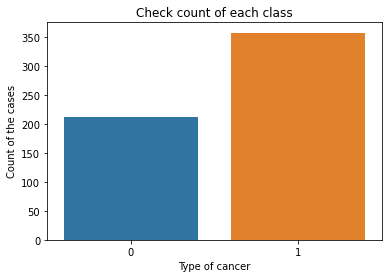

In [82]:
sns.countplot(x = y.diagnosis, data = y)
plt.title("Check count of each class")
plt.xlabel("Type of cancer")
plt.ylabel("Count of the cases")

plt.show()

Approx 200+ females have a "M" type of breaset cancer and around 350 females have "B" type of breast cancer

### Checking distribution of the independent variables

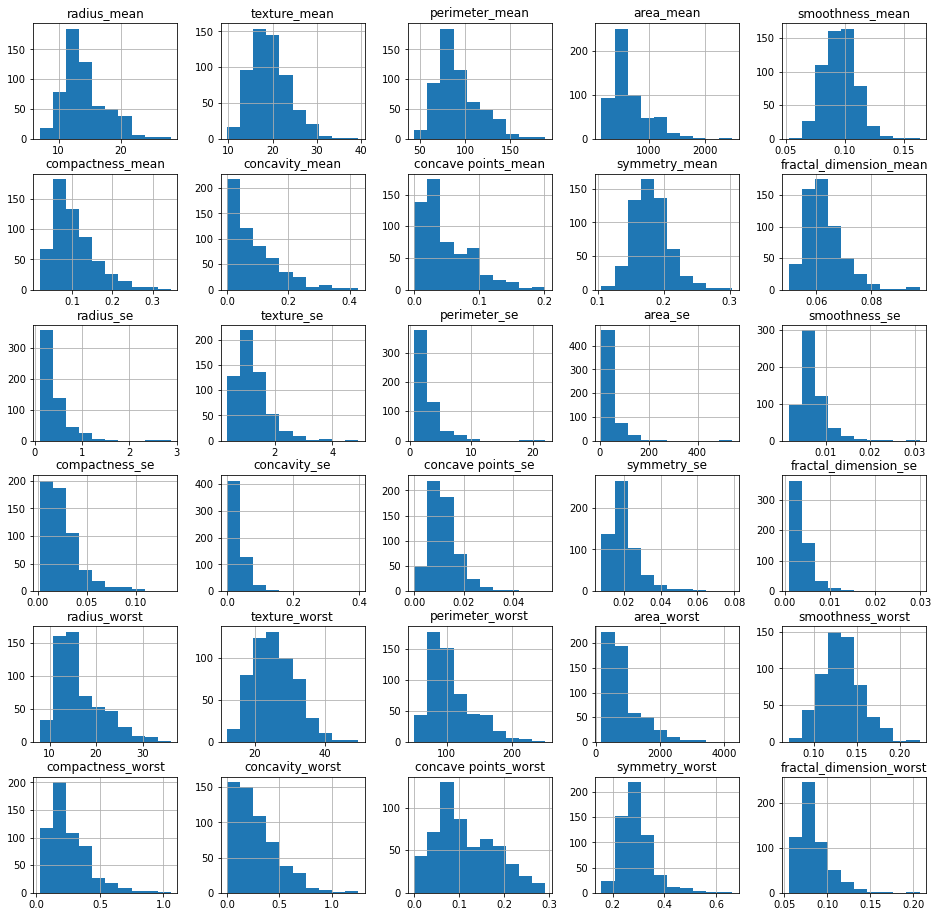

In [54]:
df.hist(figsize=(16,16))
plt.show()

### Checking Multicollinearity in the variables

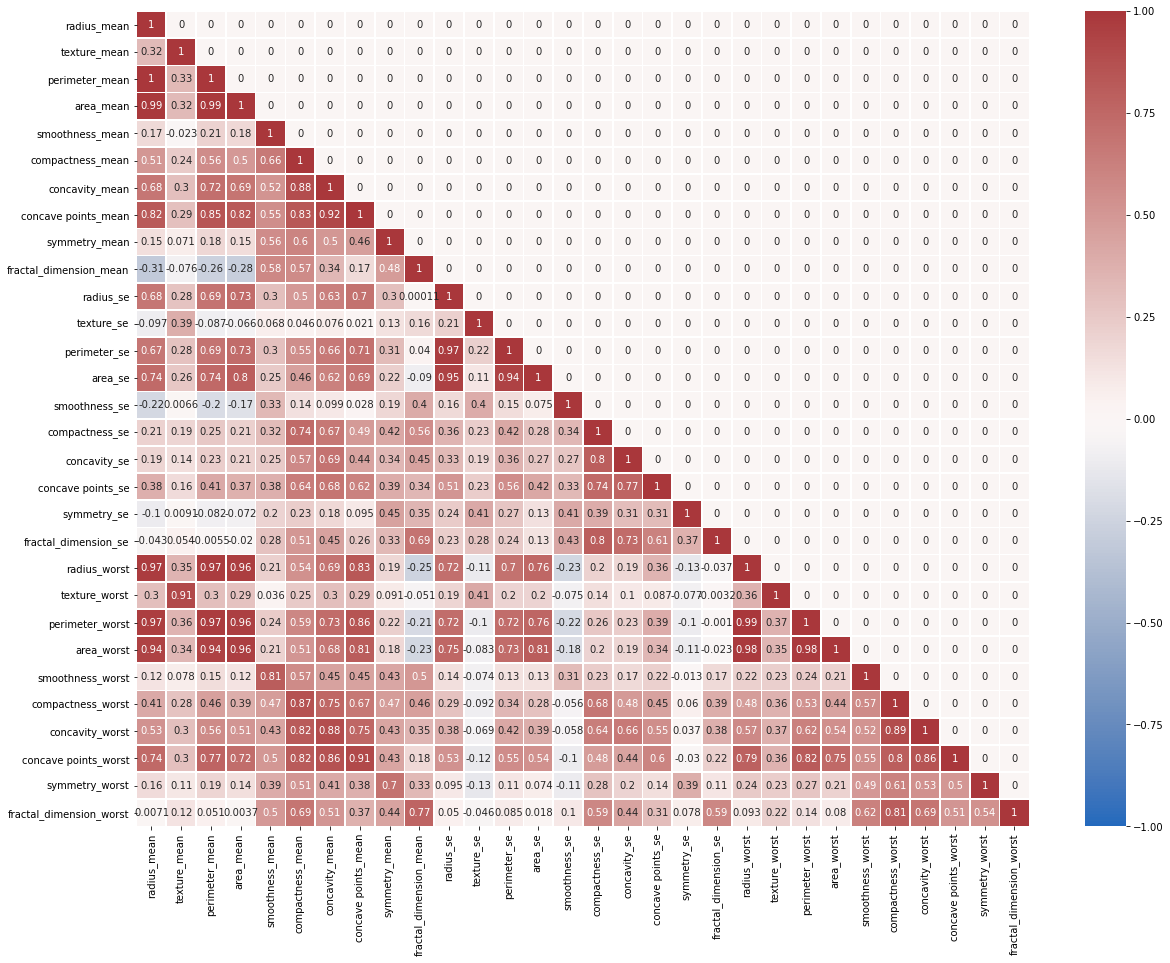

In [58]:
num_cols = df.select_dtypes(include=np.number).columns.values

plt.figure(figsize=(20, 15))
cor = df[num_cols].corr()
cor = np.tril(cor)
ax = sns.heatmap(cor, annot=True, vmin=-1, vmax=+1, xticklabels=df.columns,
                 yticklabels=df.columns, cmap = "vlag", linecolor="white",
                linewidths=0.7)

IndexError: index 6 is out of bounds for axis 0 with size 6

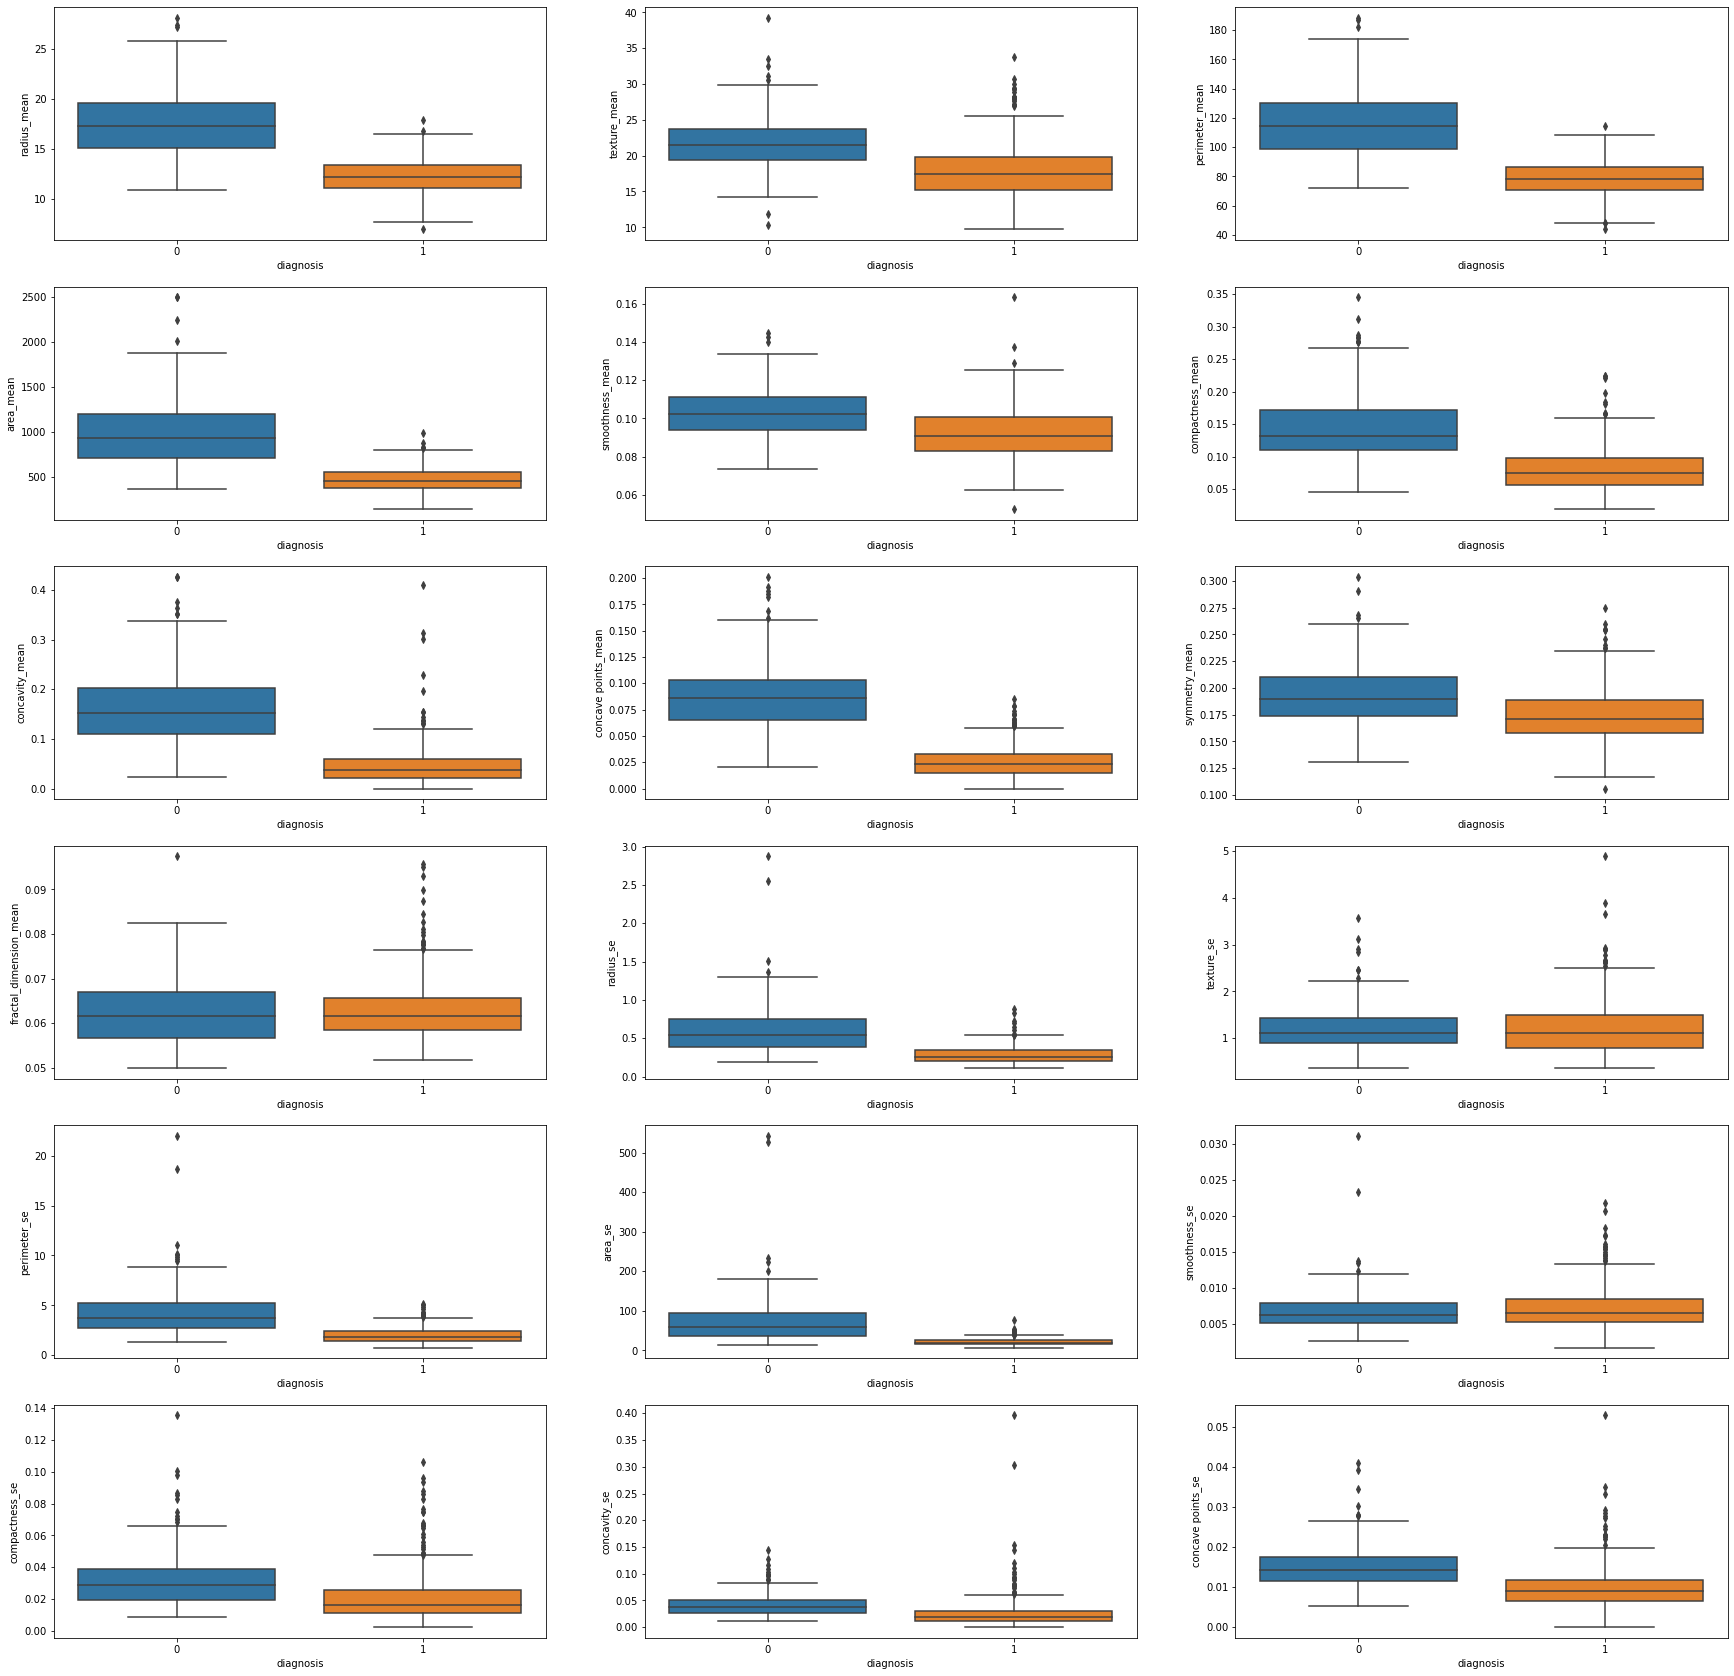

In [83]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize = (30,30))
row = 0
col = 0
for i in range (0, len(df.columns)):
    if col> 2:
        row += 1
        col = 0
    axes = ax[row, col]
    sns.boxplot(x = y['diagnosis'], y = df[df.columns[i]], ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Feature by class")
plt.show()

In [84]:
x = df[ : ]
print(x.head(3))
print("\n")
print(y.head(3))

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   
2                 0.05999  ...         23.57          25.53            152.5   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0 

### Model building

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

### Feature Scaling

In [86]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


## Logistic Regression model

In [87]:
lgr_model = LogisticRegression()
lgr_model.fit(x_train, y_train )


C:\Users\miihi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

### Prediction and performance matrix

In [97]:
y_pred = lgr_model.predict(x_test)

prob = lgr_model.predict_proba(x_test )
print(prob)

[[9.99915179e-01 8.48207509e-05]
 [1.18842580e-01 8.81157420e-01]
 [9.95717383e-01 4.28261713e-03]
 [2.95795029e-05 9.99970420e-01]
 [1.54153715e-03 9.98458463e-01]
 [1.11116051e-02 9.88888395e-01]
 [3.22070108e-01 6.77929892e-01]
 [9.99979262e-01 2.07379986e-05]
 [2.39008088e-02 9.76099191e-01]
 [2.96079668e-02 9.70392033e-01]
 [3.00647036e-05 9.99969935e-01]
 [9.99999728e-01 2.72078085e-07]
 [1.00000000e+00 5.57579692e-11]
 [9.99962758e-01 3.72417940e-05]
 [2.29564179e-05 9.99977044e-01]
 [1.99092549e-01 8.00907451e-01]
 [7.58918384e-01 2.41081616e-01]
 [3.30373178e-03 9.96696268e-01]
 [1.76644658e-03 9.98233553e-01]
 [1.09364140e-03 9.98906359e-01]
 [7.83400935e-02 9.21659906e-01]
 [1.55713080e-05 9.99984429e-01]
 [8.00024492e-01 1.99975508e-01]
 [9.99999698e-01 3.02349958e-07]
 [9.56992829e-01 4.30071709e-02]
 [9.99301953e-01 6.98046696e-04]
 [1.75348599e-03 9.98246514e-01]
 [1.06047494e-04 9.99893953e-01]
 [8.56134880e-05 9.99914387e-01]
 [6.53649878e-05 9.99934635e-01]
 [1.002577

### Accuracy of the model

In [90]:
score_log = lgr_model.score(x_test, y_test)
score_log

0.9532163742690059

### Confusion Matrix

In [92]:
actual = y_test
predicted = y_pred

conf_mat = confusion_matrix(actual, predicted)
print(conf_mat)

[[ 61   8]
 [  0 102]]


1. TP = 61
2. FN = 8
3. FP = 0
4. TN = 102



#### $ TPR = Sensitivity = \frac{TP}{TP + FN} $

#### $ Specificity = \frac{TN}{TN + FP} $

#### $ FPR = 1 - Specificity = \frac{FP}{FP + TN} $

In [93]:
tpr = 61 / (61 + 8)
print("true Positive rate:", np.round(tpr, 2))

spec = 102 / (102 + 0)
print("Specificity:", np.round(spec,2))

fpr = 0 / (0 + 102)
print("false positive rate :", np.round(fpr, 2))

true Positive rate: 0.88
Specificity: 1.0
false positive rate : 0.0


In [94]:
report = classification_report(actual, predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        69
           1       0.93      1.00      0.96       102

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



## ROC Curve - Reciever Operating Characteristic

Often choosing best model is sort of balance between practising the one's accurately or the zeroe's accurately.

Predicting 1's accurately is called Sensitivity

Predicting 0's accurately is called Specificity

Both these aspects can be captured together in the ROC Curve.

Area Under the curve can be used as a evaluation metric to compare the efficacy of the models

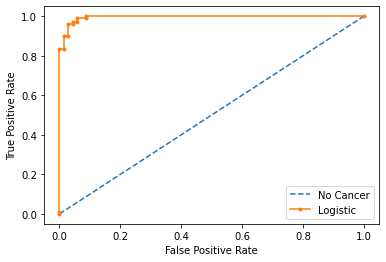

In [99]:
## GENERATE A NO SKILL PREDICTION (MAJORITY CLASS GENERALLY)
ns_probs = [0 for _ in range(len(y_test))]

## KEEP PROBABILITIES FOR POSITIVE OUTCOMES ONLY
lr_probs = prob[:, 1]

## CALCULATE ROC CURVES
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

## PLOT THE ROC CURVE FO THE MODEL
pyplot.plot(ns_fpr, ns_tpr, linestyle = "--", label = "No Cancer")
pyplot.plot(lr_fpr, lr_tpr, marker = ".", label = "Logistic")

## AXIS LABELS
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")

pyplot.legend()

pyplot.show()

# AUC

In [101]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.995
